In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk')

In [16]:
def read_exp_res(exp_name):
    control_val = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
    utility_val = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
    control_test = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
    utility_test = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
    similarity_test = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
    return control_val, utility_val, control_test, utility_test, similarity_test

In [18]:
def show_exp_res_tables(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    display("Ctrl Val", df1, "Ctrl Test", df3, "Utility Val", df2, "Utility Test", df4, "Sim Test", df5)

    df_acc = df4[['eps', utility_metric]]
    display("Test " + utility_metric, df_acc)

    df_loss = df5[df5['metric'] == privacy_loss_metric]
    display("All " + privacy_loss_metric, df_loss)

    df_loss_metric = df_loss[['eps', 'mean_all']]
    display("Mean " + privacy_loss_metric, df_loss_metric) 

In [37]:
def plot_exp_res(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    df_u = df4[['eps', utility_metric]]
    df_loss = df5[df5['metric'] == privacy_loss_metric]
    df_loss_metric = df_loss[['eps', 'mean_all']]
    
    x_u = df_u['eps']
    x_l = df_loss_metric['eps']
    y_u = df_u[utility_metric]
    y_l = df_loss_metric['mean_all']
    no_dp_legend = []

    if x_u[0] == "no_dp":
        x_u = x_u[1:]
        x_l = x_l[1:]
        x_u = np.array(x_u, dtype=float)
        x_l = np.array(x_l, dtype=float)
        plt.hlines(y_u[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        plt.hlines(y_l[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        no_dp_legend = [exp_name + "_gen_no_dp_" + utility_metric, exp_name + "_gen_no_dp_" + privacy_loss_metric]
        y_u = y_u[1:]
        y_l = y_l[1:]
    
    x_u = np.array(x_u, dtype=float)
    x_l = np.array(x_l, dtype=float)


    plt.plot(x_u, y_u, color=next(cycol))
    plt.plot(x_l, y_l, color=next(cycol))
    plt.xlabel("eps")
    plt.savefig(str(exp_name) + "_" + str(utility_metric) + "_" + str(exp_name) + "_" + str(privacy_loss_metric) + " _ " + str(no_dp_legend))
    return [exp_name + "_" + utility_metric, exp_name + "_" + privacy_loss_metric] + no_dp_legend



In [38]:
def process_res(exp_name, show_tables=False, utility_metric="acc", privacy_loss_metric = "hamming"):
    tables = read_exp_res(exp_name)
    if show_tables:
        show_exp_res_tables(exp_name, *tables, utility_metric, privacy_loss_metric)
    legend = plot_exp_res(exp_name, *tables, utility_metric, privacy_loss_metric)
    return legend

'deeplog2_a2'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.624394e+09,-21.713215,840,0,266,574,0.841667


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.624394e+09,-21.713215,1200,0,393,807,0.83625


'Utility Val'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.624394e+09,0,0.05,-66.758906,299,541,64,776,0.639881
1,1.624394e+09,1,0.50,-66.553394,306,534,39,801,0.658929
2,1.624394e+09,2,1.00,-67.253064,289,551,54,786,0.639881


'Utility Test'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.624394e+09,0,0.05,-66.758906,413,787,86,1114,0.636250
1,1.624394e+09,1,0.50,-66.553394,424,776,53,1147,0.654583
2,1.624394e+09,2,1.00,-67.253064,378,822,65,1135,0.630417


'Sim Test'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.624394e+09,0,0.05,hamming,0.912579,0.774114,0.843347
1,1.624394e+09,0,0.05,hamming_wise,17.030833,8.791667,12.911250
2,1.624394e+09,0,0.05,cosine,0.187279,0.138459,0.162869
3,1.624394e+09,1,0.50,hamming,0.908700,0.772548,0.840624
4,1.624394e+09,1,0.50,hamming_wise,16.951667,8.740000,12.845833
5,1.624394e+09,1,0.50,cosine,0.184898,0.141449,0.163173
6,1.624394e+09,2,1.00,hamming,0.904242,0.768946,0.836594
7,1.624394e+09,2,1.00,hamming_wise,16.874167,8.733333,12.803750
8,1.624394e+09,2,1.00,cosine,0.185752,0.138518,0.162135


'Test acc'

,eps,acc
0,0.05,0.636250
1,0.50,0.654583
2,1.00,0.630417


'All hamming'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.624394e+09,0,0.05,hamming,0.912579,0.774114,0.843347
3,1.624394e+09,1,0.50,hamming,0.908700,0.772548,0.840624
6,1.624394e+09,2,1.00,hamming,0.904242,0.768946,0.836594


'Mean hamming'

,eps,mean_all
0,0.05,0.843347
3,0.50,0.840624
6,1.00,0.836594


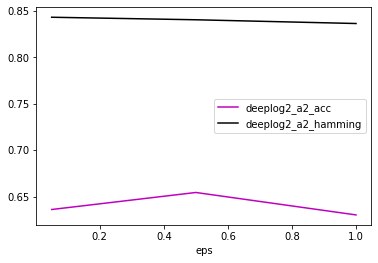

In [39]:
exps = ['deeplog2_a2']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_b2'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.624391e+09,-28.13253,840,0,110,730,0.934524


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.624391e+09,-28.13253,1200,0,186,1014,0.9225


'Utility Val'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624391e+09,0,no_dp,0,-67.131368,305,535,42,798,0.656548
1,1.624391e+09,1,0.05,1,-66.603886,314,526,43,797,0.661310
2,1.624392e+09,2,0.5,1,-66.312840,312,528,54,786,0.653571
3,1.624392e+09,3,1,1,-66.736482,310,530,59,781,0.649405


'Utility Test'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624391e+09,0,no_dp,0,-67.131368,404,796,61,1139,0.642917
1,1.624391e+09,1,0.05,1,-66.603886,425,775,55,1145,0.654167
2,1.624392e+09,2,0.5,1,-66.312840,420,780,91,1109,0.637083
3,1.624392e+09,3,1,1,-66.736482,417,783,77,1123,0.641667


'Sim Test'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624391e+09,0,no_dp,0,hamming,0.886103,0.766473,0.826288
1,1.624391e+09,0,no_dp,0,hamming_wise,16.501667,8.573333,12.537500
2,1.624391e+09,0,no_dp,0,cosine,0.183093,0.139102,0.161098
3,1.624391e+09,1,0.05,1,hamming,0.911190,0.773801,0.842496
4,1.624391e+09,1,0.05,1,hamming_wise,17.005000,8.765833,12.885417
5,1.624391e+09,1,0.05,1,cosine,0.187504,0.140384,0.163944
6,1.624392e+09,2,0.5,1,hamming,0.907772,0.774998,0.841385
7,1.624392e+09,2,0.5,1,hamming_wise,16.939167,8.751667,12.845417
8,1.624392e+09,2,0.5,1,cosine,0.183932,0.137118,0.160525
9,1.624392e+09,3,1,1,hamming,0.902020,0.772437,0.837228


'Test acc'

,eps,acc
0,no_dp,0.642917
1,0.05,0.654167
2,0.5,0.637083
3,1,0.641667


'All hamming'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624391e+09,0,no_dp,0,hamming,0.886103,0.766473,0.826288
3,1.624391e+09,1,0.05,1,hamming,0.911190,0.773801,0.842496
6,1.624392e+09,2,0.5,1,hamming,0.907772,0.774998,0.841385
9,1.624392e+09,3,1,1,hamming,0.902020,0.772437,0.837228


'Mean hamming'

,eps,mean_all
0,no_dp,0.826288
3,0.05,0.842496
6,0.5,0.841385
9,1,0.837228


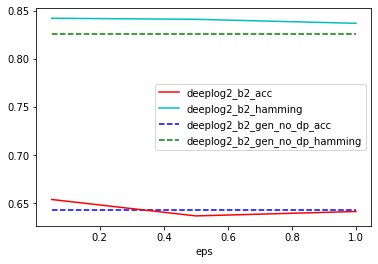

In [40]:
exps = ['deeplog2_b2']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_c2'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.624395e+09,-36.28671,628,212,50,790,0.844048


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.624395e+09,-36.28671,902,298,80,1120,0.8425


'Utility Val'

,date,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624396e+09,no_dp,0,-9.506943,721,119,41,799,0.904762
1,1.624396e+09,0.05,1,-5.700075,751,89,732,108,0.511310
2,1.624396e+09,0.5,1,-8.169516,559,281,367,473,0.614286
3,1.624397e+09,1,1,-10.294849,597,243,446,394,0.589881


'Utility Test'

,date,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624396e+09,no_dp,0,-9.506943,1045,155,63,1137,0.909167
1,1.624396e+09,0.05,1,-5.700075,1107,93,1042,158,0.527083
2,1.624396e+09,0.5,1,-8.169516,810,390,548,652,0.609167
3,1.624397e+09,1,1,-10.294849,848,352,672,528,0.573333


'Sim Test'

,date,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624396e+09,no_dp,0,hamming,0.240456,0.269965,0.255211
1,1.624396e+09,no_dp,0,hamming_wise,3.830833,2.470833,3.150833
2,1.624396e+09,no_dp,0,cosine,0.052412,0.084905,0.068658
3,1.624396e+09,0.05,1,hamming,0.867466,0.674447,0.770957
4,1.624396e+09,0.05,1,hamming_wise,16.224167,8.161667,12.192917
5,1.624396e+09,0.05,1,cosine,0.214874,0.143293,0.179084
6,1.624396e+09,0.5,1,hamming,0.874738,0.680061,0.777399
7,1.624396e+09,0.5,1,hamming_wise,16.358333,8.262500,12.310417
8,1.624396e+09,0.5,1,cosine,0.272794,0.176329,0.224562
9,1.624397e+09,1,1,hamming,0.863036,0.679849,0.771442


'Test acc'

,eps,acc
0,no_dp,0.909167
1,0.05,0.527083
2,0.5,0.609167
3,1,0.573333


'All hamming'

,date,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624396e+09,no_dp,0,hamming,0.240456,0.269965,0.255211
3,1.624396e+09,0.05,1,hamming,0.867466,0.674447,0.770957
6,1.624396e+09,0.5,1,hamming,0.874738,0.680061,0.777399
9,1.624397e+09,1,1,hamming,0.863036,0.679849,0.771442


'Mean hamming'

,eps,mean_all
0,no_dp,0.255211
3,0.05,0.770957
6,0.5,0.777399
9,1,0.771442


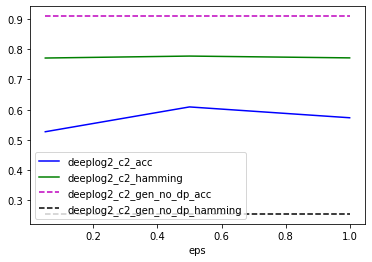

In [41]:
exps = ['deeplog2_c2']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_d2'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.624392e+09,-36.633817,628,212,45,795,0.847024


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.624392e+09,-36.633817,900,300,71,1129,0.845417


'Utility Val'

,date,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624393e+09,no_dp,0,-1.900309,840,0,319,521,0.810119
1,1.624393e+09,0.05,1,-66.396830,314,526,42,798,0.661905
2,1.624393e+09,0.5,1,-66.959941,290,550,87,753,0.620833
3,1.624393e+09,1,1,-66.538262,315,525,42,798,0.662500


'Utility Test'

,date,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624393e+09,no_dp,0,-1.900309,1200,0,398,802,0.834167
1,1.624393e+09,0.05,1,-66.396830,430,770,56,1144,0.655833
2,1.624393e+09,0.5,1,-66.959941,399,801,120,1080,0.616250
3,1.624393e+09,1,1,-66.538262,428,772,53,1147,0.656250


'Sim Test'

,date,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624393e+09,no_dp,0,hamming,0.325621,0.283315,0.304468
1,1.624393e+09,no_dp,0,hamming_wise,5.540833,2.743333,4.142083
2,1.624393e+09,no_dp,0,cosine,0.066402,0.081543,0.073973
3,1.624393e+09,0.05,1,hamming,0.913944,0.779898,0.846921
4,1.624393e+09,0.05,1,hamming_wise,17.056667,8.811667,12.934167
5,1.624393e+09,0.05,1,cosine,0.188595,0.138165,0.163380
6,1.624393e+09,0.5,1,hamming,0.910657,0.777088,0.843872
7,1.624393e+09,0.5,1,hamming_wise,16.987500,8.801667,12.894583
8,1.624393e+09,0.5,1,cosine,0.186669,0.139282,0.162975
9,1.624393e+09,1,1,hamming,0.910988,0.775604,0.843296


'Test acc'

,eps,acc
0,no_dp,0.834167
1,0.05,0.655833
2,0.5,0.616250
3,1,0.656250


'All hamming'

,date,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624393e+09,no_dp,0,hamming,0.325621,0.283315,0.304468
3,1.624393e+09,0.05,1,hamming,0.913944,0.779898,0.846921
6,1.624393e+09,0.5,1,hamming,0.910657,0.777088,0.843872
9,1.624393e+09,1,1,hamming,0.910988,0.775604,0.843296


'Mean hamming'

,eps,mean_all
0,no_dp,0.304468
3,0.05,0.846921
6,0.5,0.843872
9,1,0.843296


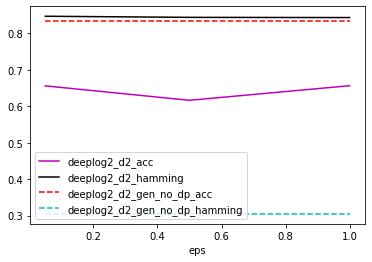

In [42]:
exps = ['deeplog2_d2']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()